# Librerias

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import random

In [2]:
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom
from keras.models import Sequential
from keras import layers

# Datasets

[Kaggle: Fruit Images for Object Detection](https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection)

## Train & validation datasets

In [3]:
train_imgs = []       
train_labels = []
shape = (200,200)  
train_path = '/content/drive/MyDrive/Escuela/ITESM IDM/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos II/Módulo 2/Momento Retroalimentación Deep Learning/Fruits/train/'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_imgs.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_imgs)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

print(x_train.shape)

(180, 200, 200, 3)


## Test dataset

In [4]:
test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/MyDrive/Escuela/ITESM IDM/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos II/Módulo 2/Momento Retroalimentación Deep Learning/Fruits/test/'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

test_labels_dum = pd.get_dummies(test_labels).values

[0 0 1 0]


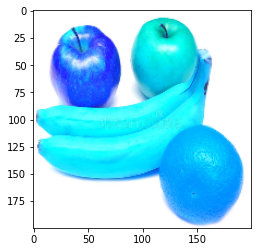

In [5]:
index = random.randint(0,x_train.shape[0])
print(train_labels[index])
plt.imshow(train_images[index])

# Modelos

## Primer Modelo: Red Densa



*   2 Capas Densas



In [6]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=(200,200,3,)))
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(4, activation='softmax'))


model1.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 100)               12000100  
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 12,000,504
Trainable params: 12,000,504
Non-trainable params: 0
_________________________________________________________________


In [7]:
history1 = model1.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 3s 86ms/step - loss: 22810.1855 - acc: 0.2722 - val_loss: 29285.2559 - val_acc: 0.3833
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 31817.8770 - acc: 0.3222 - val_loss: 16013.4854 - val_acc: 0.3000
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 17591.7910 - acc: 0.3000 - val_loss: 8837.3428 - val_acc: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 6797.3188 - acc: 0.4111 - val_loss: 4602.0181 - val_acc: 0.3500
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 4057.6135 - acc: 0.3333 - val_loss: 1753.9510 - val_acc: 0.5500
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 1530.0654 - acc: 0.6111 - val_loss: 2366.1514 - val_acc: 0.4833
Epoch 7/50
4/4 [==============================] - 0s 21ms/step - loss: 1490.2509 - acc: 0.6056 - val_loss: 2822.4932 - val_acc: 0.4333
Epoch 8/50
4/4 [==============================] - 

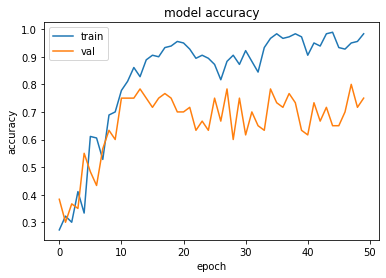

In [8]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

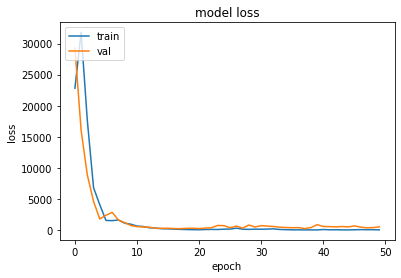

In [9]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
evaluate1 = model1.evaluate(x_val,y_val)
print(evaluate1)

2/2 [==============================] - 0s 13ms/step - loss: 488.8738 - acc: 0.7500
[488.87384033203125, 0.75]


In [11]:
evaluate1 = model1.evaluate(test_images, test_labels_dum)
print(evaluate1)

2/2 [==============================] - 0s 10ms/step - loss: 585.3768 - acc: 0.7500
[585.3768310546875, 0.75]


In [50]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict1 = model1.predict(np.array(checkImage))
print(predict1)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict1)])


1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 1.]]
Actual :-  ['banana']
Predicted :-  orange


## Segindo Modelo: Red Convolutiva I

*   1 Capa Convolutiva
*   1 Capa Pooling
*   1 Capa Densa





In [51]:
model2= Sequential()
model2.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model2.add(MaxPool2D(2,2))
model2.add(Flatten())
model2.add(Dense(4,activation = 'softmax'))
    
model2.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 313632)            0         
                                                                 
 dense_15 (Dense)            (None, 4)                 1254532   
                                                                 
Total params: 1,255,428
Trainable params: 1,255,428
Non-trainable params: 0
_________________________________________________________________


In [52]:
history2 = model2.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 1s 91ms/step - loss: 213.5345 - acc: 0.3111 - val_loss: 45.1746 - val_acc: 0.4167
Epoch 2/50
4/4 [==============================] - 0s 42ms/step - loss: 118.5772 - acc: 0.4111 - val_loss: 154.7639 - val_acc: 0.3500
Epoch 3/50
4/4 [==============================] - 0s 41ms/step - loss: 106.8788 - acc: 0.4611 - val_loss: 11.4532 - val_acc: 0.7000
Epoch 4/50
4/4 [==============================] - 0s 38ms/step - loss: 32.7143 - acc: 0.5500 - val_loss: 23.9610 - val_acc: 0.6833
Epoch 5/50
4/4 [==============================] - 0s 40ms/step - loss: 14.2669 - acc: 0.7333 - val_loss: 29.1437 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 39ms/step - loss: 15.0532 - acc: 0.7111 - val_loss: 13.0759 - val_acc: 0.7667
Epoch 7/50
4/4 [==============================] - 0s 40ms/step - loss: 7.8016 - acc: 0.8556 - val_loss: 18.5777 - val_acc: 0.6667
Epoch 8/50
4/4 [==============================] - 0s 39ms/step - loss: 7.0471 - 

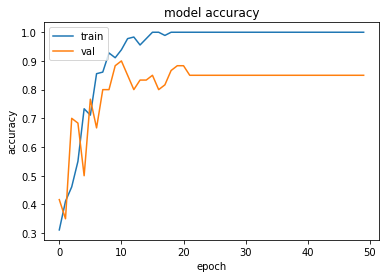

In [53]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

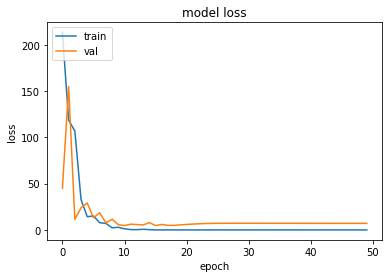

In [54]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
evaluate2 = model2.evaluate(x_val,y_val)
print(evaluate2)

2/2 [==============================] - 0s 15ms/step - loss: 7.0854 - acc: 0.8500
[7.0854291915893555, 0.8500000238418579]


In [56]:
evaluate2 = model2.evaluate(test_images, test_labels_dum)
print(evaluate2)

2/2 [==============================] - 0s 13ms/step - loss: 11.0416 - acc: 0.7833
[11.041586875915527, 0.7833333611488342]


In [57]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict2 = model2.predict(np.array(checkImage))
print(predict2)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict2)])


1/1 [==============================] - 0s 52ms/step
[[1. 0. 0. 0.]]
Actual :-  ['banana']
Predicted :-  apple


## Tercer Modelo: Red Convolutiva II

*   4 Capas Convolutivas
*   2 Capas Pooling
*   3 Capas Densas

In [20]:
model3= Sequential()
model3.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model3.add(Flatten())

model3.add(Dense(20,activation='relu'))
model3.add(Dense(15,activation='relu'))
model3.add(Dense(4,activation = 'softmax'))
    
model3.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 30)       

In [21]:
history3 = model3.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 3s 465ms/step - loss: 4.5526 - acc: 0.2111 - val_loss: 3.1064 - val_acc: 0.5333
Epoch 2/50
4/4 [==============================] - 0s 97ms/step - loss: 2.5669 - acc: 0.3500 - val_loss: 1.0862 - val_acc: 0.7333
Epoch 3/50
4/4 [==============================] - 0s 96ms/step - loss: 0.9289 - acc: 0.6389 - val_loss: 0.7642 - val_acc: 0.7667
Epoch 4/50
4/4 [==============================] - 0s 96ms/step - loss: 0.5948 - acc: 0.8167 - val_loss: 0.8532 - val_acc: 0.7167
Epoch 5/50
4/4 [==============================] - 0s 106ms/step - loss: 0.5820 - acc: 0.7778 - val_loss: 0.6148 - val_acc: 0.7667
Epoch 6/50
4/4 [==============================] - 0s 98ms/step - loss: 0.4793 - acc: 0.8111 - val_loss: 0.5162 - val_acc: 0.8833
Epoch 7/50
4/4 [==============================] - 0s 104ms/step - loss: 0.3736 - acc: 0.8667 - val_loss: 0.4214 - val_acc: 0.8833
Epoch 8/50
4/4 [==============================] - 0s 103ms/step - loss: 0.3475 - acc: 0.8944 -

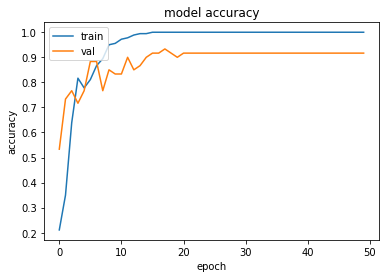

In [22]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

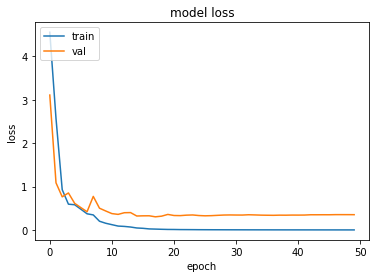

In [23]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
evaluate3 = model3.evaluate(x_val,y_val)
print(evaluate3)

2/2 [==============================] - 1s 253ms/step - loss: 0.3531 - acc: 0.9167
[0.3530861437320709, 0.9166666865348816]


In [25]:
evaluate3 = model3.evaluate(test_images, test_labels_dum)
print(evaluate3)

2/2 [==============================] - 0s 21ms/step - loss: 0.7379 - acc: 0.8167
[0.7378793358802795, 0.8166666626930237]


In [26]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict3 = model3.predict(np.array(checkImage))
print(predict3)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict3)])


1/1 [==============================] - 0s 157ms/step
[[1.7288228e-06 9.5130755e-03 2.1369992e-02 9.6911520e-01]]
Actual :-  ['orange']
Predicted :-  orange


## Cuarto Modelo: Red Convolutiva II c/ Batch Normalization

*   4 Capas Convolutivas
*   2 Capas Pooling
*   3 Capas Densas
*   3 Capas BatchNormalization

In [41]:
model4= Sequential()
model4.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(2,2))
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(2,2))
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model4.add(BatchNormalization())

model4.add(Flatten())

model4.add(Dense(20,activation='relu'))
model4.add(Dense(15,activation='relu'))
model4.add(Dense(4,activation = 'softmax'))
    
model4.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 batch_normalization_6 (Batc  (None, 196, 196, 30)     120       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 batch_normalization_7 (Batc  (None, 96, 96, 30)      

In [42]:
history4 = model4.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 2s 195ms/step - loss: 1.5469 - acc: 0.5833 - val_loss: 5.0273 - val_acc: 0.3500
Epoch 2/50
4/4 [==============================] - 0s 115ms/step - loss: 0.9811 - acc: 0.7889 - val_loss: 3.2047 - val_acc: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 115ms/step - loss: 0.3017 - acc: 0.9111 - val_loss: 1.6603 - val_acc: 0.5333
Epoch 4/50
4/4 [==============================] - 0s 114ms/step - loss: 0.2402 - acc: 0.9500 - val_loss: 2.4845 - val_acc: 0.5333
Epoch 5/50
4/4 [==============================] - 0s 115ms/step - loss: 0.1042 - acc: 0.9667 - val_loss: 2.1865 - val_acc: 0.6333
Epoch 6/50
4/4 [==============================] - 0s 115ms/step - loss: 0.3176 - acc: 0.9556 - val_loss: 3.7940 - val_acc: 0.5500
Epoch 7/50
4/4 [==============================] - 0s 123ms/step - loss: 0.1572 - acc: 0.9556 - val_loss: 3.4198 - val_acc: 0.5667
Epoch 8/50
4/4 [==============================] - 0s 115ms/step - loss: 0.0599 - acc: 0.98

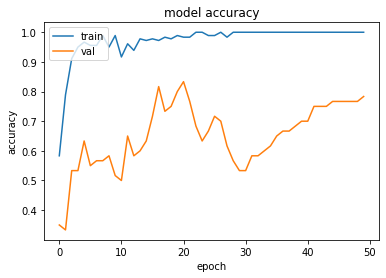

In [43]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

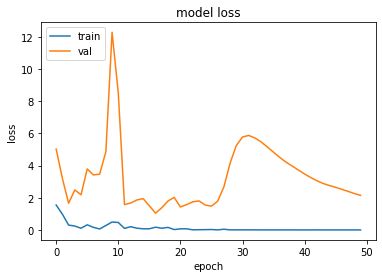

In [44]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
evaluate4 = model4.evaluate(x_val,y_val)
print(evaluate4)

2/2 [==============================] - 0s 23ms/step - loss: 2.1477 - acc: 0.7833
[2.1476871967315674, 0.7833333611488342]


In [46]:
evaluate4 = model4.evaluate(test_images, test_labels_dum)
print(evaluate4)

2/2 [==============================] - 0s 23ms/step - loss: 3.1477 - acc: 0.8333
[3.1476738452911377, 0.8333333134651184]


In [48]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict4 = model4.predict(np.array(checkImage))
print(predict4)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict4)])


1/1 [==============================] - 0s 18ms/step
[[1.0000000e+00 7.6156827e-13 5.3953182e-15 1.6240818e-09]]
Actual :-  ['apple']
Predicted :-  apple


## Quinto Modelo: Red Convolutiva II c/ B.N. & Data Augmentation

*   1 Capa RandomFlip
*   1 Capa RandomRotation
*   1 Capa RandomZoom
*   4 Capas Convolutivas
*   2 Capas Pooling
*   3 Capas Densas
*   3 Capas BatchNormalization

In [34]:
model5= Sequential()
model5.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model5.add(RandomFlip("horizontal"))
model5.add(RandomRotation(0.1))
model5.add(RandomZoom(0.2))
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(2,2))
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(BatchNormalization())

model5.add(Flatten())

model5.add(Dense(20,activation='relu'))
model5.add(Dense(15,activation='relu'))
model5.add(Dense(4,activation = 'softmax'))
    
model5.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 random_flip (RandomFlip)    (None, 198, 198, 32)      0         
                                                                 
 random_rotation (RandomRota  (None, 198, 198, 32)     0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 198, 198, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 batch_normalization_3 (Batc  (None, 196, 196, 30)     120       
 hNormalization)                                      

In [35]:
history5 = model5.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 5s 256ms/step - loss: 3.6833 - acc: 0.3056 - val_loss: 6.6393 - val_acc: 0.2667
Epoch 2/50
4/4 [==============================] - 1s 245ms/step - loss: 1.7626 - acc: 0.6167 - val_loss: 4.1428 - val_acc: 0.2667
Epoch 3/50
4/4 [==============================] - 1s 226ms/step - loss: 1.7041 - acc: 0.6278 - val_loss: 3.0897 - val_acc: 0.3167
Epoch 4/50
4/4 [==============================] - 1s 182ms/step - loss: 1.4164 - acc: 0.7000 - val_loss: 1.8908 - val_acc: 0.4167
Epoch 5/50
4/4 [==============================] - 1s 186ms/step - loss: 1.1666 - acc: 0.7056 - val_loss: 1.6208 - val_acc: 0.4333
Epoch 6/50
4/4 [==============================] - 1s 182ms/step - loss: 1.2064 - acc: 0.7278 - val_loss: 1.6373 - val_acc: 0.4000
Epoch 7/50
4/4 [==============================] - 1s 188ms/step - loss: 1.0183 - acc: 0.8000 - val_loss: 1.2100 - val_acc: 0.5833
Epoch 8/50
4/4 [==============================] - 1s 186ms/step - loss: 1.0877 - acc: 0.78

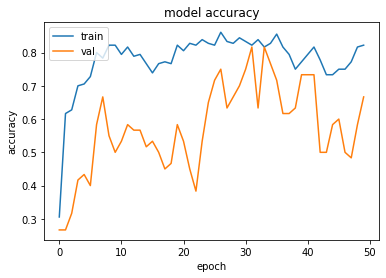

In [36]:
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

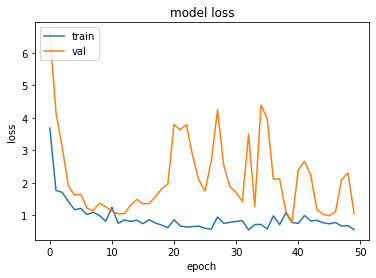

In [37]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
evaluate5 = model5.evaluate(x_val,y_val)
print(evaluate5)

2/2 [==============================] - 0s 30ms/step - loss: 1.0419 - acc: 0.6667
[1.0418827533721924, 0.6666666865348816]


In [39]:
evaluate5 = model5.evaluate(test_images, test_labels_dum)
print(evaluate5)

2/2 [==============================] - 0s 29ms/step - loss: 1.5970 - acc: 0.7333
[1.5970122814178467, 0.7333333492279053]


In [59]:
index = random.randint(1,len(test_images))

checkImage = test_images[index-1:index]
checklabel = test_labels[index-1:index]

predict5 = model5.predict(np.array(checkImage))
print(predict5)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict5)])


1/1 [==============================] - 0s 23ms/step
[[0.00550762 0.83502364 0.05791169 0.10155713]]
Actual :-  ['orange']
Predicted :-  banana


# Comparación Final



---
**1er Modelo:** Validtion Accuracy: 75% | Test Accuracy: 75% | Prediction Test: Failed | Conclusión: Una red densa no es suficiente


---
**2do Modelo:** Validtion Accuracy: 85% | Test Accuracy: 78% | Prediction Test: Failed | Conclusion: Una arquitectura más profunda puede ayudar


---
**3er Modelo:** Validtion Accuracy: 92% | Test Accuracy: 82% | Prediction Test: Passed | Conclusión: *Mejor modelo*


---
**4to Modelo:** Validtion Accuracy: 78% | Test Accuracy: 83% | Prediction Test: Passed | Conclusión: No es necesario agregar batch normalization


---
**5to Modelo:** Validtion Accuracy: 67% | Test Accuracy: 73% | Prediction Test: Failed | Conclusión: Demasiadas tecnicas


---








Trabajo a futuro: 
Implementar un callback con early stopping para evitar el overfitting en el training accuracy